In [1]:
#from IPython.core.display import clear_output

#!pip3 install pandas-profiling==2.11
#clear_output()

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
#! cp /content/drive/MyDrive/semester7/Thesis/Models/* ./ -r
#! cp /content/drive/MyDrive/semester7/Thesis/Datasets/* ./ -r

In [3]:
#!gdown 1YHqgEFHoXa5vpSfKteAhBUWsJJ2RHgS7 -O data.csv

In [4]:
cd ..

/home/danil-pass123/Desctop/semester7/Thesis/Model_stage5_after_session _stage2


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from pandas_profiling import ProfileReport

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import minmax_scale

from Datasets.ProcessDataset import Dataset

import torch
from sklearn.model_selection import train_test_split

from Models.Optimisers.GD import StochasticGradientDescent
from Models.Optimisers.Adam import Adam

#from Models.LogisticRegression.LogisticRegression import Logistic_Regression
#from Models.LogisticRegression.LogisticRegression_layer import Logistic_Regression_train
from Models.LogisticRegression.LogisticRegression_numpy import Logistic_Regression_numpy
from Models.LogisticRegression.LogisticRegression_sklearn import Logistic_Regression_origin

from Models.FederatedLearning.Server import server
from Models.FederatedLearning.Worker import worker

from Models.MatrixScheduler.MatrixScheduler_identical import MatrixScheduler_identical
from Models.MatrixScheduler.MatrixScheduler_k import MatrixScheduler_k
from Models.MatrixScheduler.MatrixScheduler_k_array import MatrixScheduler_k_array

from Models.StatisticClass import Statistic
from Models.StatisticClass import comparsion_array_loss,comparsion_array_weights,comparsion_array_acc
from Models.StatisticClass import comparsion_array_loss_one_plot

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression


from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [6]:
import random
random.seed(42)

# load Dataset

In [7]:
data = Dataset(dataset_name = 'Titanic')
X,y = data.X,data.y

In [8]:
cd Reports

/home/danil-pass123/Desctop/semester7/Thesis/Model_stage5_after_session _stage2/Reports


# Classification Model

In [9]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
#X_train,y_train,X_test,y_test = torch.tensor(X_train),torch.tensor(y_train),torch.tensor(X_test),torch.tensor(y_test)

# Logistic regression

In [10]:
LR_EPOCH = {"lr":1e-2,"epoch":1000}

## Model original

### Один прогон алгоритма

In [11]:
LR_EPOCH

{'lr': 0.01, 'epoch': 1000}

In [12]:
stat_origin = Statistic(X_test,y_test,"sklearn model")
log_regr = Logistic_Regression_origin(stat_collector=stat_origin,lr = LR_EPOCH['lr'],epoch = LR_EPOCH['epoch'])

log_regr.train(X_train,y_train)

#### Результаты

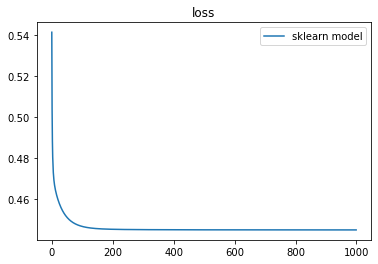

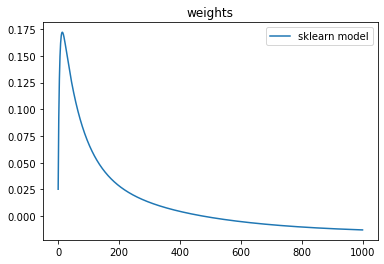

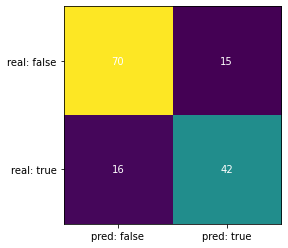

[[70 15]
 [16 42]]
balanced_accuracy_score: 0.7738336713995944
accuracy_score: 0.7832167832167832


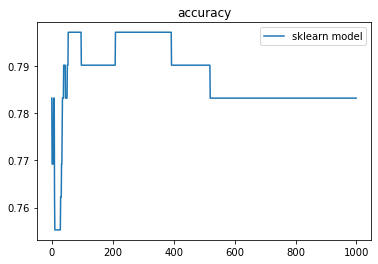

Train:
Min val: 0,Max val: 0.972009466014327,Mean: 0.42627142997467965            ,Var: 0.09586268850821535
Test:
Min val: 0.04506270653748383,Max val: 0.972009466014327,Mean: 0.42627142997467965            ,Var: 0.09586268850821535


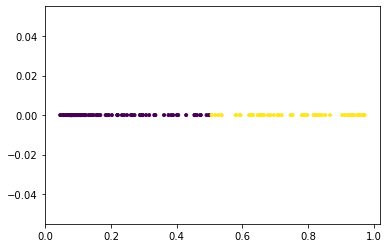

In [13]:
stat_origin.loss_plot()
stat_origin.weight_plot()
stat_origin.c_matrix
stat_origin.plot_confusion_matrix()
stat_origin.print_accuracy()
stat_origin.acc_plot()
stat_origin.show_y_distr()

In [14]:
"""
from sklearn.linear_model import SGDClassifier
s = SGDClassifier(loss = 'log',max_iter=1000,
              random_state=42,
              alpha=0,
              learning_rate='constant',eta0=0.01,penalty=None)
s.fit(X,y)
print(np.concatenate([s.intercept_.reshape((1,-1)),s.coef_],axis=1).reshape(-1,1))
s.set_params(np.linspace(0,0.7,11).reshape((11,1)))
print(np.concatenate([s.intercept_.reshape((1,-1)),s.coef_],axis=1).reshape(-1,1))
"""

"\nfrom sklearn.linear_model import SGDClassifier\ns = SGDClassifier(loss = 'log',max_iter=1000,\n              random_state=42,\n              alpha=0,\n              learning_rate='constant',eta0=0.01,penalty=None)\ns.fit(X,y)\nprint(np.concatenate([s.intercept_.reshape((1,-1)),s.coef_],axis=1).reshape(-1,1))\ns.set_params(np.linspace(0,0.7,11).reshape((11,1)))\nprint(np.concatenate([s.intercept_.reshape((1,-1)),s.coef_],axis=1).reshape(-1,1))\n"

### Несколько запусков

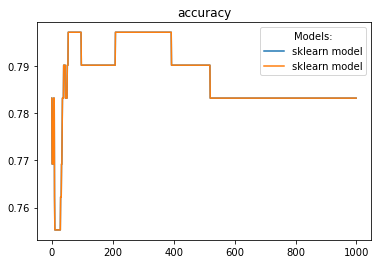

In [15]:
stats_origin = []
for _ in range(5):
    stat_origin = Statistic(X_test,y_test,"sklearn model")
    log_regr = Logistic_Regression_origin(stat_collector=stat_origin,lr = LR_EPOCH['lr'],epoch = LR_EPOCH['epoch'])

    log_regr.train(X_train,y_train)
    
    stats_origin.append(stat_origin)
stats_origin[4].comparison_accuracy_plot(stats_origin[2])

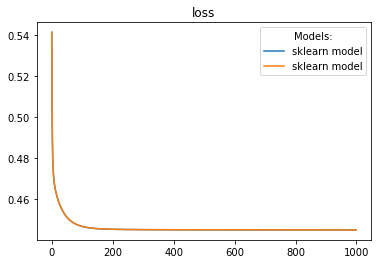

In [16]:
stats_origin[0].comparison_loss_plot(stats_origin[3])

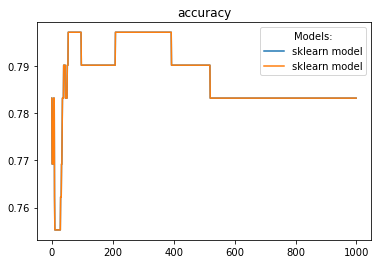

In [17]:
stats_origin[0].comparison_accuracy_plot(stats_origin[3])

In [18]:
#comparsion_array_loss_one_plot(stats_origin[:2])

## Model numpy

### Один прогон алгоритма

In [19]:
LR_EPOCH

{'lr': 0.01, 'epoch': 1000}

In [31]:
stat_np = Statistic(X_test,y_test,"numpy model")
log_regr_n = Logistic_Regression_numpy(n_features = X_train.shape[1],lr = LR_EPOCH['lr'],
                                       epoch = LR_EPOCH['epoch'],stat_collector=stat_np)
log_regr_n.train(X_train,y_train)

In [32]:
stat_np1 = Statistic(X_test,y_test,"numpy model1")
opt = StochasticGradientDescent(lr = LR_EPOCH['lr'])
log_regr_n1 = Logistic_Regression_numpy(n_features = X_train.shape[1],optimizer = opt,
                                       epoch = LR_EPOCH['epoch'],stat_collector=stat_np1)
log_regr_n1.train(X_train,y_train)

In [33]:
stat_np1.iterations

1000

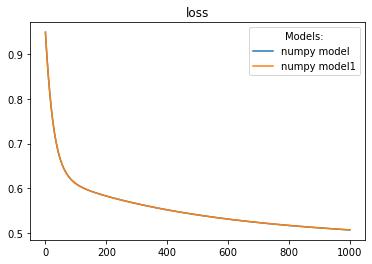

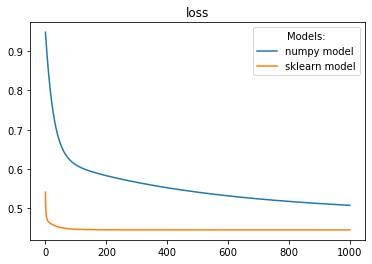

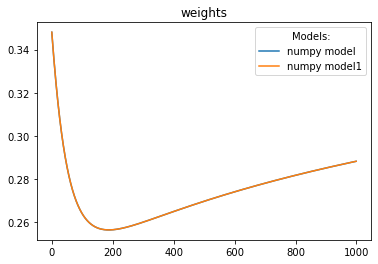

difference(numpy model,numpy model1) = numpy model - numpy model1


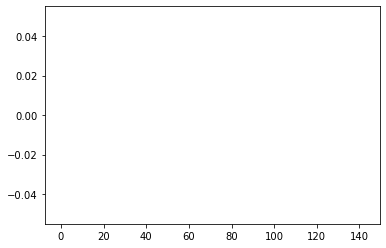

MSE(numpy model,numpy model1) = 0.0


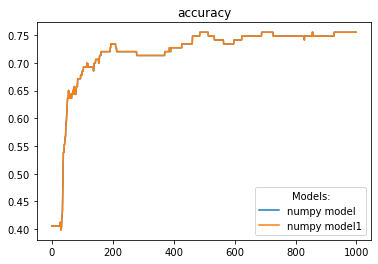

In [34]:
#stat_np,stat_origin
stat_np.comparison_loss_plot(stat_np1)
stat_np.comparison_loss_plot(stat_origin)
stat_np.comparison_weights_plot(stat_np1)
stat_np.comparison_mse(stat_np1)
stat_np.comparison_accuracy_plot(stat_np1)

#### Результаты

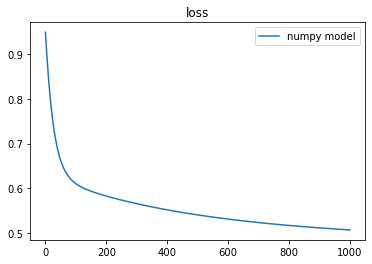

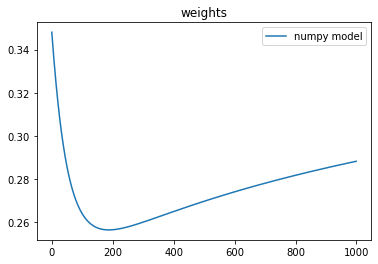

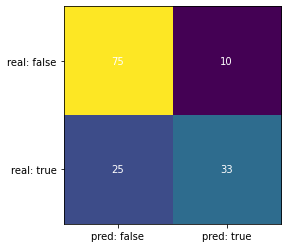

[[75 10]
 [25 33]]
balanced_accuracy_score: 0.725659229208925
accuracy_score: 0.7552447552447552


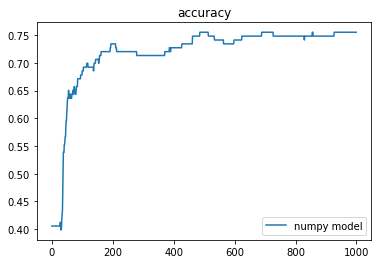

Train:
Min val: 0.0,Max val: 0.8531760761506986,Mean: 0.39735823968337214            ,Var: 0.04112966715882217
Test:
Min val: 0.16309412726364877,Max val: 0.8531760761506986,Mean: 0.39735823968337214            ,Var: 0.04112966715882217


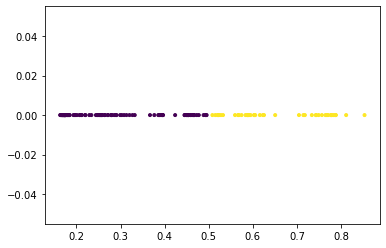

In [19]:
stat_np.loss_plot()
stat_np.weight_plot()
stat_np.c_matrix
stat_np.plot_confusion_matrix()
stat_np.print_accuracy()
stat_np.acc_plot()
stat_np.show_y_distr()

#### Проверка градиетов
По определению производной производную примерно равна:

$lim_{\epsilon} \frac{(Loss(w+\epsilon) - Loss(w-\epsilon))}{2\epsilon}$

Среднее значение произодной в каждую итерацию

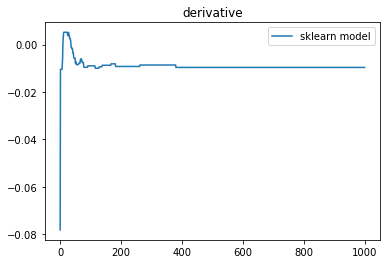

In [20]:
stat_origin.der_mean_plot()

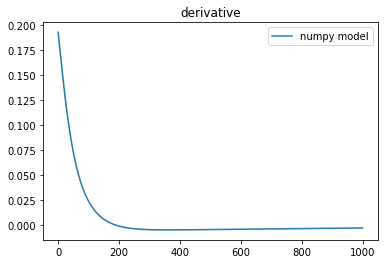

In [21]:
stat_np.der_mean_plot()

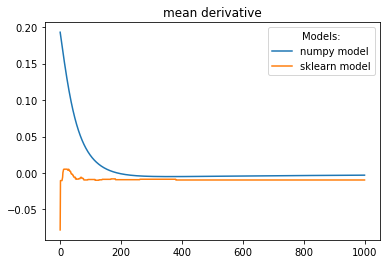

In [22]:
stat_np.comparison_der_mean_plot(stat_origin)

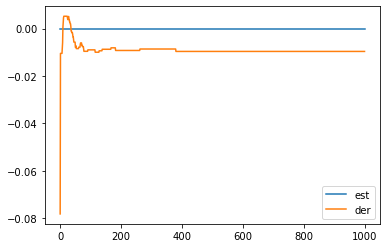

In [23]:
plt.plot(stat_origin.iter_list,stat_origin.estimated_der,label="est")
plt.plot(stat_origin.iter_list,stat_origin.derivative_mean,label="der")
plt.legend()

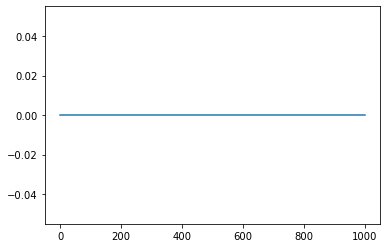

In [24]:
plt.plot(stat_origin.iter_list,stat_origin.estimated_der,label="est")

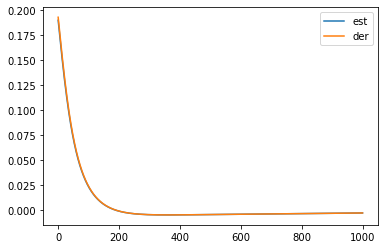

In [25]:
plt.plot(stat_np.iter_list,stat_np.estimated_der,label="est")
plt.plot(stat_np.iter_list,stat_np.derivative_mean,label="der")
plt.legend()

### Несколько запусков


In [26]:
stats_numpy = []
for _ in range(5):
    stat_numpy = Statistic(X_test,y_test,"sklearn model")
    log_regr = Logistic_Regression_numpy(n_features = X_train.shape[1],stat_collector=stat_numpy,lr = LR_EPOCH['lr'],epoch = LR_EPOCH['epoch'])

    log_regr.train(X_train,y_train)
    
    stats_numpy.append(stat_numpy)

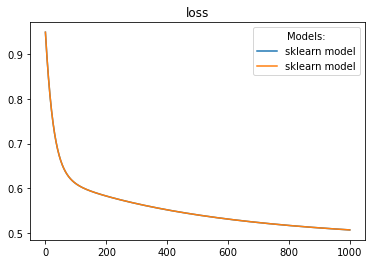

In [27]:
stats_numpy[0].comparison_loss_plot(stats_numpy[3])

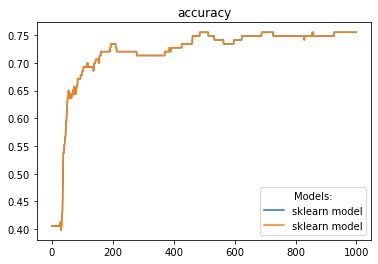

In [37]:
stats_numpy[0].comparison_accuracy_plot(stats_numpy[3])

In [29]:
#stats_numpy[2].comparison_der_mean_plot(stats_numpy[4])

In [30]:
#for i in range(11):
#    stats_numpy[3].comparison_weight_plot(stats_numpy[4],i)

### Запуск от разных начальных значений

In [31]:
stat_np1 = Statistic(X_test,y_test,"numpy model 1")
log_regr_n = Logistic_Regression_numpy(n_features = X_train.shape[1],lr = LR_EPOCH['lr'],
                                       epoch = LR_EPOCH['epoch'],stat_collector=stat_np1)
log_regr_n.set_weights(np.linspace(0,0.5,11).reshape((11,1)))
log_regr_n.train(X_train,y_train)

stat_np2 = Statistic(X_test,y_test,"numpy model 2")
log_regr_n = Logistic_Regression_numpy(n_features = X_train.shape[1],lr = LR_EPOCH['lr'],
                                       epoch = LR_EPOCH['epoch'],stat_collector=stat_np2)
log_regr_n.set_weights(np.linspace(-2.7,2.7,11).reshape((11,1)))
log_regr_n.train(X_train,y_train)

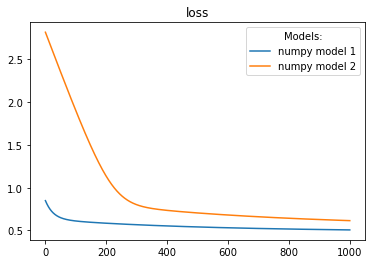

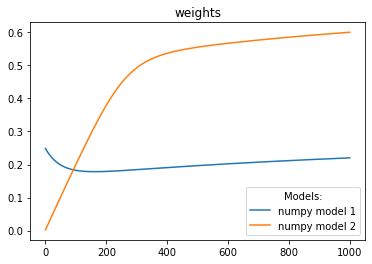

difference(numpy model 1,numpy model 2) = numpy model 1 - numpy model 2


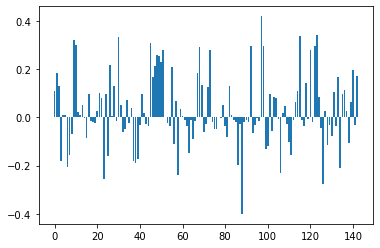

MSE(numpy model 1,numpy model 2) = 0.012309531765956649


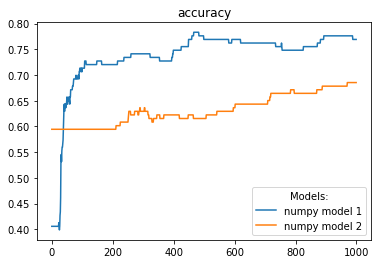

In [32]:
#stat_np,stat_origin
stat_np1.comparison_loss_plot(stat_np2)
stat_np1.comparison_weights_plot(stat_np2)
stat_np1.comparison_mse(stat_np2)
stat_np1.comparison_accuracy_plot(stat_np2)

## Сравнение

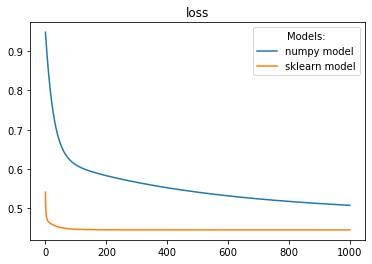

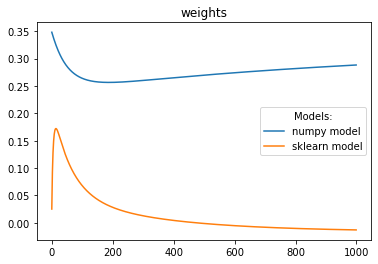

difference(numpy model,sklearn model) = numpy model - sklearn model


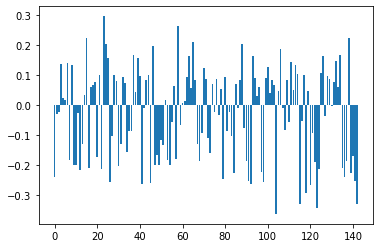

MSE(numpy model,sklearn model) = 0.37125237809320333


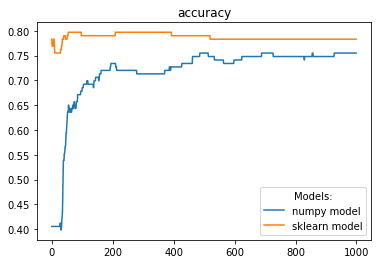

In [33]:
#stat_np,stat_origin
stat_np.comparison_loss_plot(stat_origin)
stat_np.comparison_weights_plot(stat_origin)
stat_np.comparison_mse(stat_origin)
stat_np.comparison_accuracy_plot(stat_origin)

Графики производных

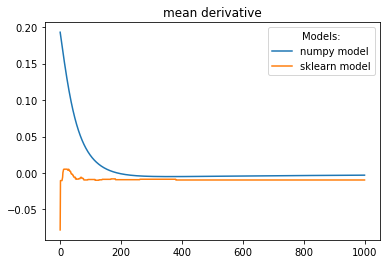

In [34]:
stat_np.comparison_der_mean_plot(stat_origin)

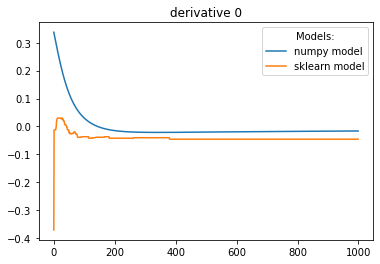

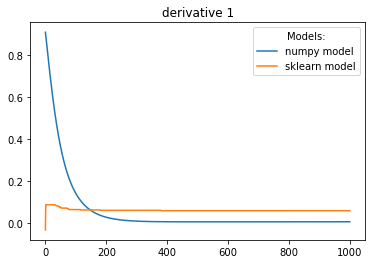

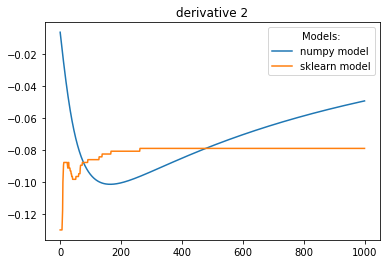

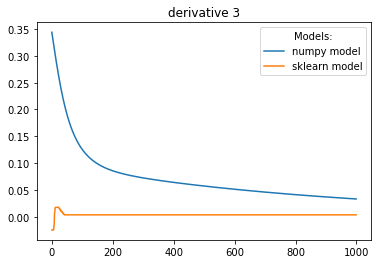

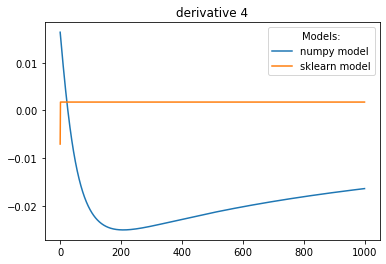

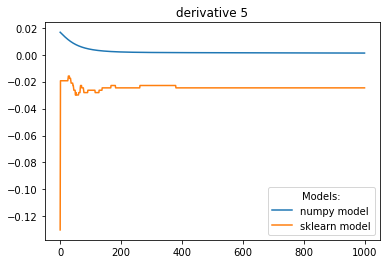

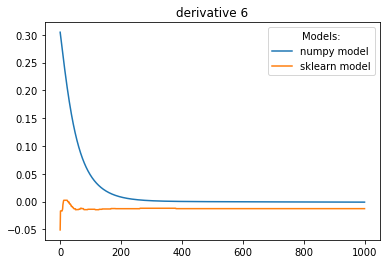

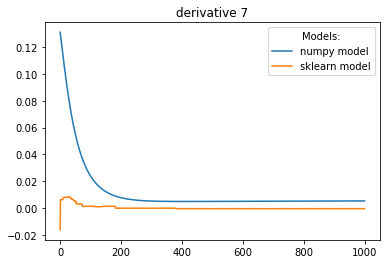

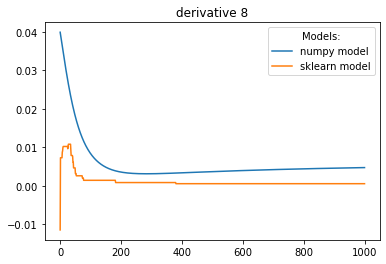

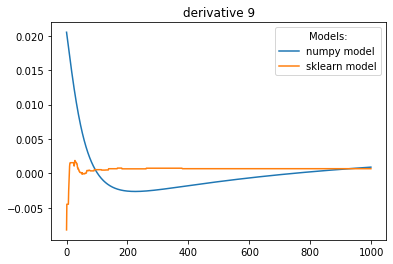

In [35]:
for i in range(10):
    stat_np.comparison_der_plot(stat_origin,i)    

Параметров

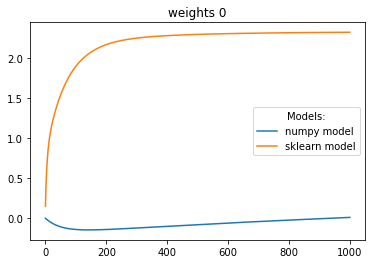

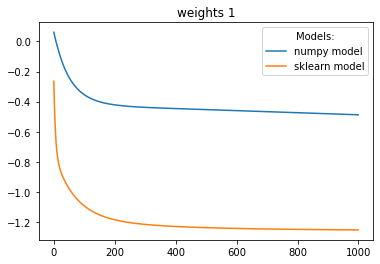

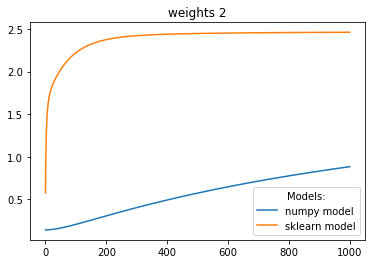

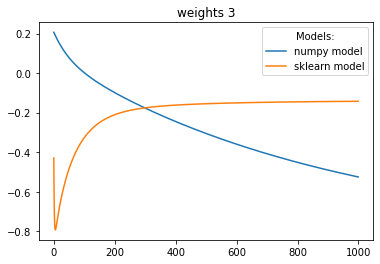

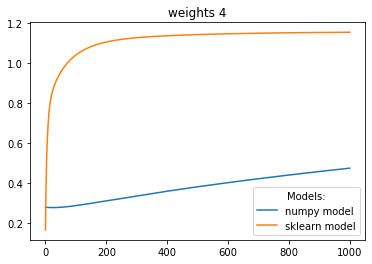

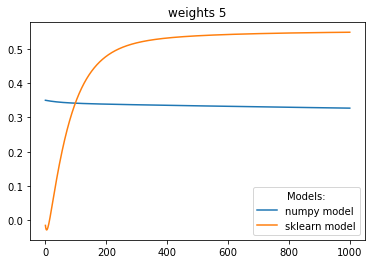

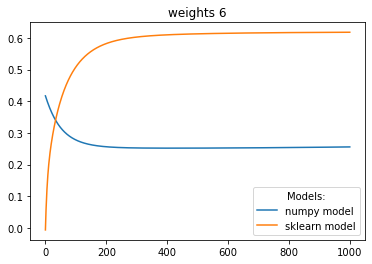

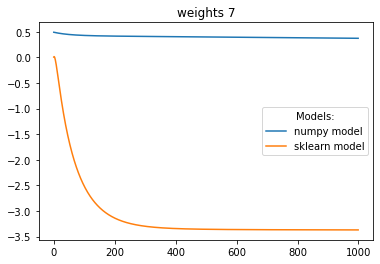

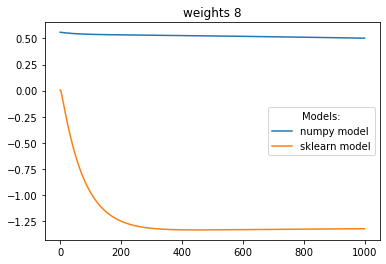

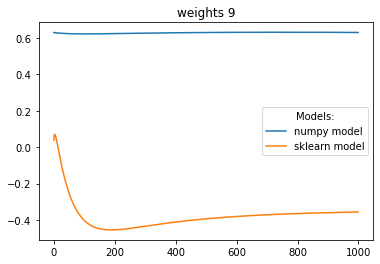

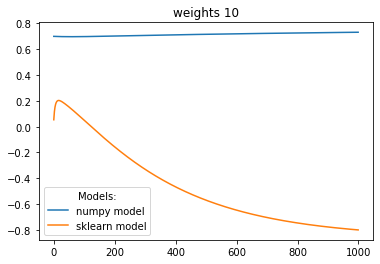

In [36]:
for i in range(11):
    stat_np.comparison_weight_plot(stat_origin,i)